In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(platetools)))
suppressWarnings(suppressPackageStartupMessages(library(gridExtra)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(viridis)))
suppressWarnings(suppressPackageStartupMessages(library(argparse)))    
suppressWarnings(suppressPackageStartupMessages(library(patchwork)))

In [2]:
# generate a platemap plot for the meta data
# read in the platemap data
platemap_df_path <- "../../../data/Interstellar_plate2_platemap.csv"
platemap_df <- read.csv(platemap_df_path)
# if cell_type is blank, set it to "blank"
platemap_df$cell_type[platemap_df$cell_type == ""] <- ""
# if treatment is blank, set it to "blank"
platemap_df$inducer1[platemap_df$inducer1 == ""] <- ""
# replace the "" with ""
platemap_df$inducer2[platemap_df$inducer2 == ""] <- ""
# replace the "" with ""
platemap_df$inhibitor[platemap_df$inhibitor == ""] <- ""
# replace the "" with ""
platemap_df$inhibitor_concentration[platemap_df$inhibitor_concentration == 'NA'] <- ""
platemap_df$inhibitor_concentration[is.na(platemap_df$inhibitor_concentration)] <- ""
platemap_df$inducer2_concentration[is.na(platemap_df$inducer2_concentration)] <- ""
platemap_df$inducer2[is.na(platemap_df$inducer2)] <- ""
# replace the "" with ""
platemap_df$inducer1_concentration[platemap_df$inducer1_concentration == 'NA'] <- ""
platemap_df$inducer2_concentration[platemap_df$inducer2_concentration == 'NA'] <- ""
# replace NA with ""
platemap_df$inducer1_concentration[platemap_df$inducer1_concentration == 'NA'] <- ""

In [3]:

# define save path
platemap_path <- file.path("../figures/")
# make path if it doesn't exist
if (!dir.exists(platemap_path)){
    dir.create(platemap_path)
}

In [4]:
width <- 10
height <- 7
options(repr.plot.width = width, repr.plot.height = height)

In [5]:
head(platemap_df)
# add inducer 1 to inducer 1 concentration
platemap_df$inducer1_conc <- paste(platemap_df$inducer1, platemap_df$inducer1_concentration, sep = " ")
unique(platemap_df$inducer1_conc)
platemap_df$inducer2_conc <- paste(platemap_df$inducer2, platemap_df$inducer2_concentration, sep = " ")
unique(platemap_df$inducer2_conc)
# add inducer1_conc to inducer2_conc if inducer2_conc is not blank
platemap_df$inducer_conc <- ifelse(
    platemap_df$inducer2_conc == " ",
    platemap_df$inducer1_conc, 
    paste(platemap_df$inducer1_conc, 
    platemap_df$inducer2_conc, 
    sep = " + "))
unique(platemap_df$inducer_conc)

# add inhibitor to inhibitor concentration
platemap_df$inhibitor_conc <- paste(platemap_df$inhibitor, platemap_df$inhibitor_concentration, sep = " ")
unique(platemap_df$inhibitor_conc)

,well_id,cell_type,incubation.inducer..h.,inhibitor,inhibitor_concentration,inhibitor_concentration_unit,inducer1,inducer1_concentration,inducer1_concentration_unit,inducer2,inducer2_concentration,inducer2_concentration_unit
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A01,,6,,,,,,,,,
2,B01,,6,,,,,,,,,
3,C01,,6,,,,,,,,,
4,D01,,6,,,,,,,,,
5,E01,,6,,,,,,,,,
6,F01,,6,,,,,,,,,


[1] " "                   "LPS 0.010"           "LPS 0.100"          
 [4] "LPS 1.000"           "LPS 10.000"          "LPS 100.000"        
 [7] "Disulfiram 0.100"    "Disulfiram 1.000"    "Disulfiram 2.5µM"   
[10] "H2O2 100.000"        "Flagellin 0.100"     "Flagellin 1.000"    
[13] "media ctr "          "Disulfiram 2.500"    "DMSO 0.100"         
[16] "Thapsigargin 1.000"  "Thapsigargin 10.000" "Topotecan 5.000"    
[19] "Topotecan 10.000"    "Topotecan 20.000"

[1] " "            "Nigericin 1"  "Nigericin 3"  "Nigericin 10"

[1] " "                          "LPS 0.010"                 
 [3] "LPS 0.100"                  "LPS 1.000"                 
 [5] "LPS 10.000"                 "LPS 100.000"               
 [7] "LPS 1.000 + Nigericin 1"    "LPS 1.000 + Nigericin 3"   
 [9] "LPS 1.000 + Nigericin 10"   "LPS 100.000 + Nigericin 1" 
[11] "LPS 100.000 + Nigericin 3"  "LPS 100.000 + Nigericin 10"
[13] "Disulfiram 0.100"           "Disulfiram 1.000"          
[15] "Disulfiram 2.5µM"           "H2O2 100.000"              
[17] "Flagellin 0.100"            "Flagellin 1.000"           
[19] "media ctr "                 "Disulfiram 2.500"          
[21] "DMSO 0.100"                 "Thapsigargin 1.000"        
[23] "Thapsigargin 10.000"        "Topotecan 5.000"           
[25] "Topotecan 10.000"           "Topotecan 20.000"

[1] " "              "DMSO 0.025"     "Disulfiram 0.1" "Disulfiram 1"  
 [5] "Disulfiram 2.5" "Z-VAD-FMK 100"  "DMSO 0.00025"   "Media ctr "    
 [9] "Media "         "DMSO 1"         "Z-VAD-FMK 30"

In [6]:
# replace 'media ctr  µg/ml' with 'media ctr  ug/ml'
platemap_df$inducer1_conc[platemap_df$inducer1_conc == "media ctr  µg/ml"] <- "media ctr  "
platemap_df$inducer1_conc[platemap_df$inducer1_conc == " "] <- "Blank"
platemap_df$cell_type[platemap_df$cell_type == " "] <- "Blank"
unique(platemap_df$inducer1_conc)

[1] "Blank"               "LPS 0.010"           "LPS 0.100"          
 [4] "LPS 1.000"           "LPS 10.000"          "LPS 100.000"        
 [7] "Disulfiram 0.100"    "Disulfiram 1.000"    "Disulfiram 2.5µM"   
[10] "H2O2 100.000"        "Flagellin 0.100"     "Flagellin 1.000"    
[13] "media ctr "          "Disulfiram 2.500"    "DMSO 0.100"         
[16] "Thapsigargin 1.000"  "Thapsigargin 10.000" "Topotecan 5.000"    
[19] "Topotecan 10.000"    "Topotecan 20.000"

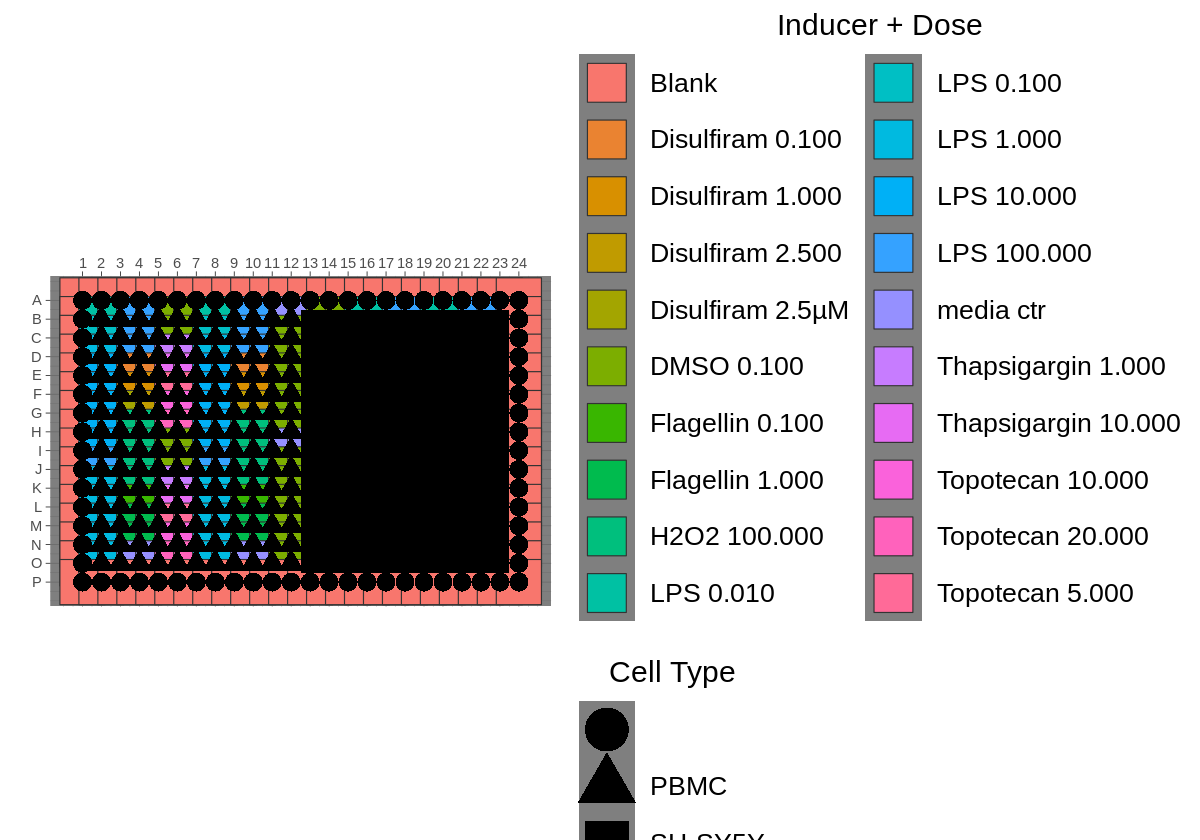

In [7]:

inducer_well_dose_platemap <- file.path(paste0(platemap_path,"inducer_well_dose_platemap.png"))
# if path does not exist, create it
platemap_plot_inducer_dose <- (
    raw_map(
        data = platemap_df$inducer1_conc,
        well = platemap_df$well_id,
        plate = 384,
        size = 14)
    + theme_dark() 
    # fill the color by dose
    + ggplot2::geom_point(
            aes(shape = platemap_df$cell_type),
            size = 5
            )
            # change the size of the shapes in the legend and plot
        # 2 column legend
        # + guides(shape = guide_legend(ncol = 2))
        + labs(fill = "Inducer + Dose", shape = "Cell Type")
        # change legend text size for fill
        
        + guides(shape = guide_legend(override.aes = list(size = 12), position = "none"))
        # remove shape legend from plot
        + guides(fill = guide_legend(override.aes = list(size = 12),ncol = 2))
        + theme(
            legend.title = element_text(size = 18,hjust = 0.5),
            legend.text = element_text(size = 16),
        )
    
)
ggsave(inducer_well_dose_platemap, platemap_plot_inducer_dose, width=8, height=8, dpi=500)
platemap_plot_inducer_dose


In [8]:
unique(platemap_df$inhibitor)

[1] ""           "DMSO"       "Disulfiram" "Z-VAD-FMK"  "Media ctr" 
[6] "Media"

In [9]:
# replace 'media ctr  µg/ml' with 'media ctr  ug/ml'
platemap_df$inhibitor[platemap_df$inhibitor == "Media ctr"] <- "Media"
platemap_df$inhibitor[platemap_df$inhibitor == " "] <- "Blank"

In [10]:
head(platemap_df)
# create a new column that is the combination of inducer and inducer concentration
platemap_df$inhibitor_conc <- paste0(platemap_df$inhibitor, " ", platemap_df$inhibitor_concentration, " ",  platemap_df$inhibitor_concentration_unit)
platemap_df$inhibitor_conc[platemap_df$inhibitor_conc == " "] <- "Blank"
unique(platemap_df$inhibitor_conc)

,well_id,cell_type,incubation.inducer..h.,inhibitor,inhibitor_concentration,inhibitor_concentration_unit,inducer1,inducer1_concentration,inducer1_concentration_unit,inducer2,inducer2_concentration,inducer2_concentration_unit,inducer1_conc,inducer2_conc,inducer_conc,inhibitor_conc
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A01,,6,,,,,,,,,,Blank,,,
2,B01,,6,,,,,,,,,,Blank,,,
3,C01,,6,,,,,,,,,,Blank,,,
4,D01,,6,,,,,,,,,,Blank,,,
5,E01,,6,,,,,,,,,,Blank,,,
6,F01,,6,,,,,,,,,,Blank,,,


[1] "  "                "DMSO 0.025 %"      "Disulfiram 0.1 µM"
 [4] "Disulfiram 1 µM"   "Disulfiram 2.5 µM" "Z-VAD-FMK 100 µM" 
 [7] "DMSO 0.00025 %"    "Media  "           "DMSO 1 %"         
[10] "Z-VAD-FMK 30 µM"

In [11]:
# replace 'media ctr  µg/ml' with 'media ctr  ug/ml'
platemap_df$inhibitor_conc[platemap_df$inhibitor_conc == "Media ctr NA "] <- "media ctr"
platemap_df$inhibitor_conc[platemap_df$inhibitor_conc == "Media NA "] <- "Media ctr"
platemap_df$inhibitor_conc[platemap_df$inhibitor_conc == " "] <- "Blank"

platemap_df$inhibitor_conc[platemap_df$inhibitor_conc == ""] <- "Blank"
platemap_df$inhibitor_conc[platemap_df$inhibitor_conc == '  '] <- "Blank"
platemap_df$cell_type[platemap_df$cell_type == ""] <- "Blank"

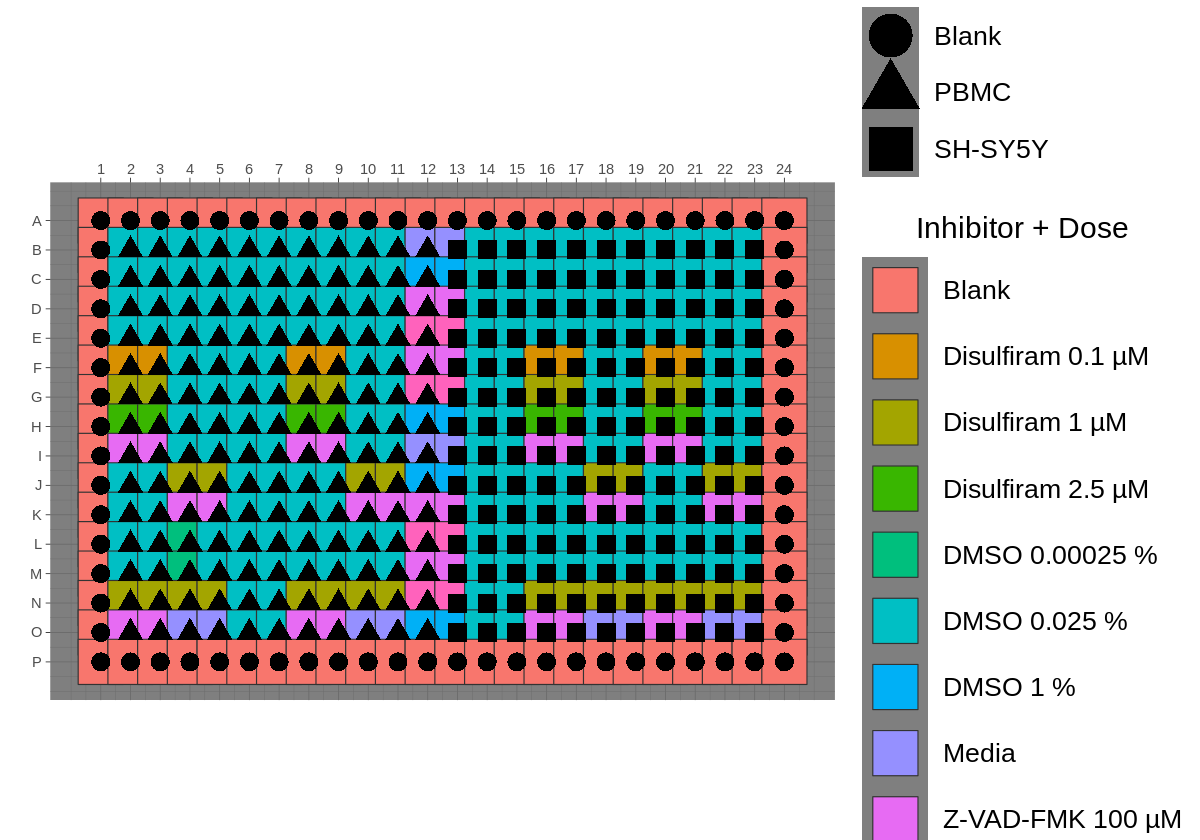

In [12]:
width <- 10
height <- 7
options(repr.plot.width = width, repr.plot.height = height)
inhibtor_well_dose_platemap <- file.path(paste0(platemap_path,"inhibtor_well_dose_platemap.png"))
# if path does not exist, create it
platemap_plot_inhibitor_dose <- (
    raw_map(
        data = platemap_df$inhibitor_conc,
        well = platemap_df$well_id,
        plate = 384,
        size = 14)
    + theme_dark() 
    # fill the color by dose
    + ggplot2::geom_point(
        aes(shape = platemap_df$cell_type),
        size = 5
        )
        # change the size of the shapes in the legend and plot
    # 2 column legend
    # + guides(shape = guide_legend(ncol = 2))
    + labs(fill = "Inhibitor + Dose", shape = "Cell Type")
    # change legend text size for fill
    
    + guides(shape = guide_legend(override.aes = list(size = 12)))
    + theme(
        legend.title = element_text(size = 18,hjust = 0.5),
        legend.text = element_text(size = 16),
    )
    


    
)
ggsave(inhibtor_well_dose_platemap, platemap_plot_inhibitor_dose, width=8, height=8, dpi=500)
platemap_plot_inhibitor_dose


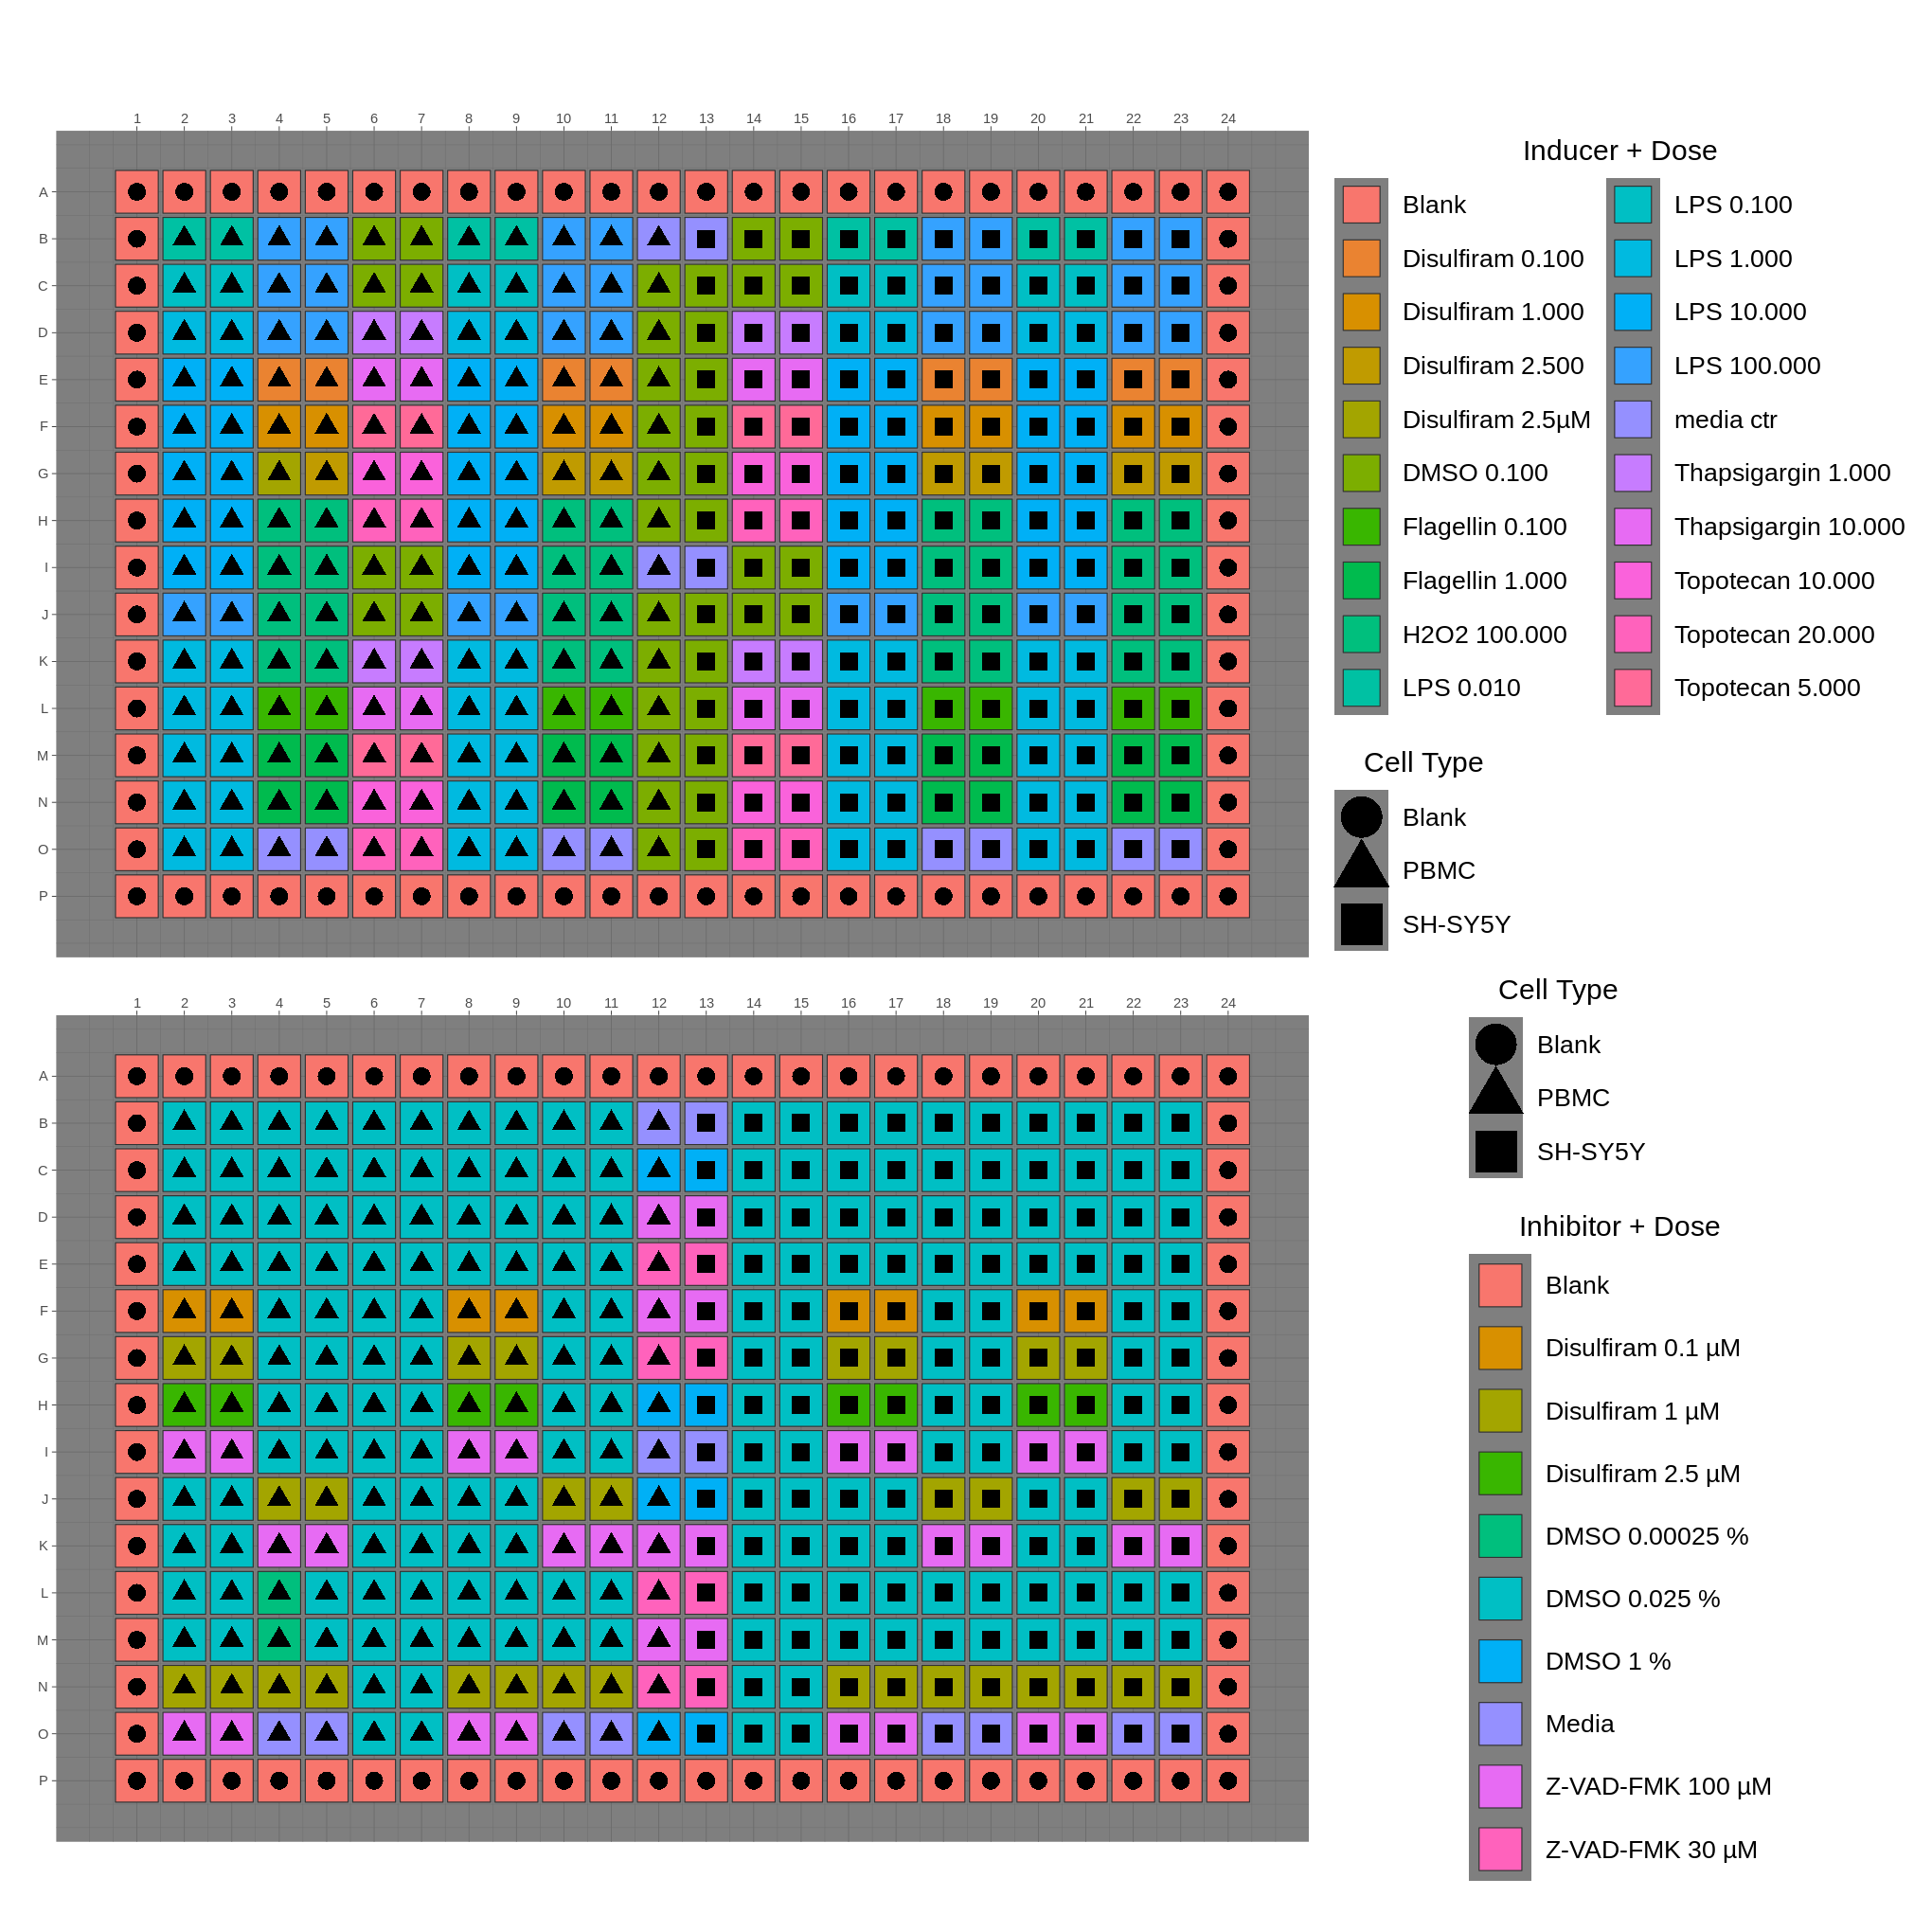

In [13]:
# pathwork for platemaps
width <- 17
height <- 17
options(repr.plot.width = width, repr.plot.height = height)
patch_plot <- (
    platemap_plot_inducer_dose
    + platemap_plot_inhibitor_dose
    + plot_layout(nrow = 2)
)
patch_plot
# set save path for patchwork plot
patchwork_platemap_path <- file.path(paste0(platemap_path,"figureS1.png"))
ggsave(patchwork_platemap_path, patch_plot, width=17, height=17, dpi=600)